In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### There are no null values 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.isnull().sum()/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

### The Dataset is clean

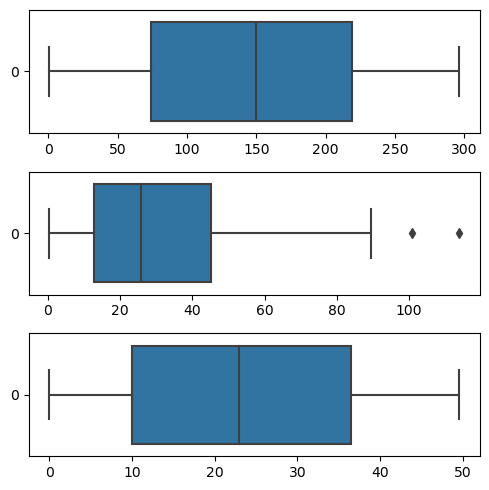

In [23]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'],orient= 'h', ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'],orient='h' ,ax = axs[1])
plt3 = sns.boxplot(df['Radio'],orient='h',ax = axs[2])
plt.tight_layout()

### There are no significant outliers in the data

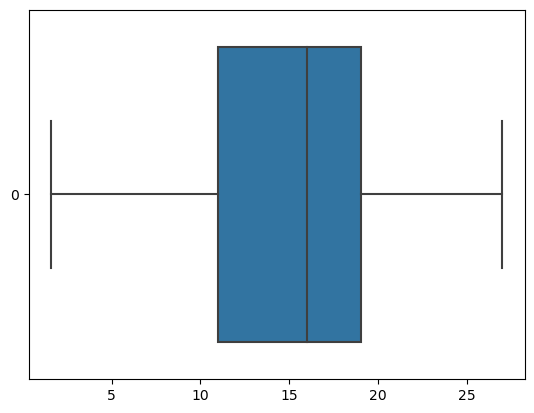

In [20]:
sns.boxplot(df['Sales'],orient='h')
plt.show()

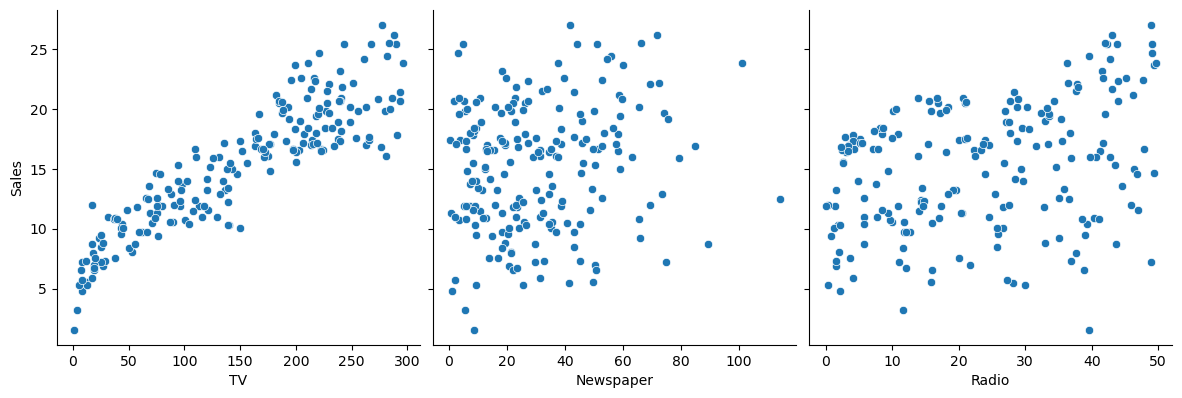

In [24]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

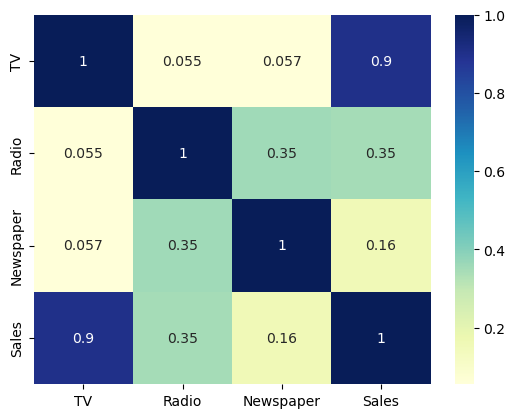

In [25]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

### The variables TV and Sales have high Correlation

In [29]:
X = df['TV']
y = df['Sales']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [33]:
X_train.head()

5        8.7
154    187.8
173    168.4
187    191.1
108     13.1
Name: TV, dtype: float64

In [34]:
y_train.head()

5       7.2
154    20.6
173    16.7
187    17.3
108     5.3
Name: Sales, dtype: float64

In [35]:
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

In [36]:
lr.params

const    6.840875
TV       0.056778
dtype: float64

In [37]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     685.8
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           2.33e-59
Time:                        17:57:47   Log-Likelihood:                -361.78
No. Observations:                 160   AIC:                             727.6
Df Residuals:                     158   BIC:                             733.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8409      0.363     18.863      0.0

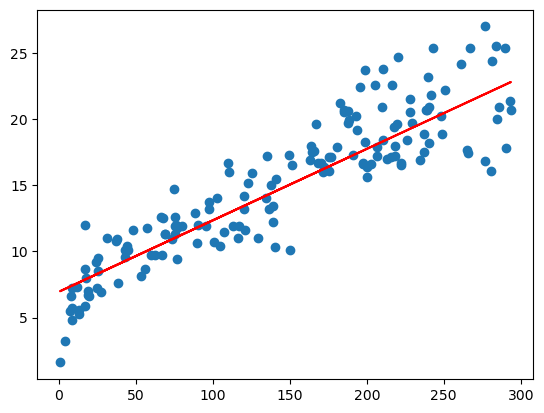

In [38]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [39]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)


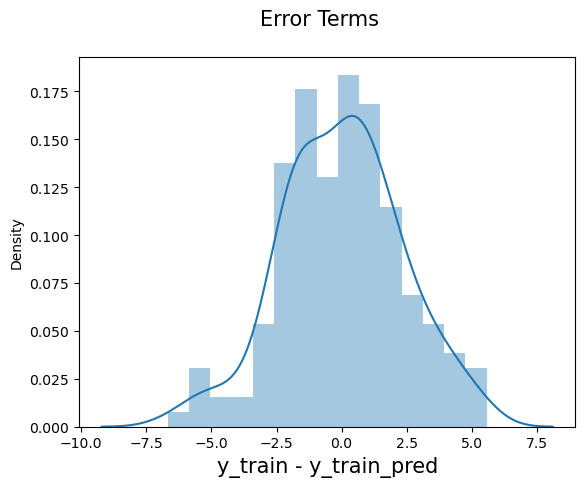

In [41]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)     
plt.show()

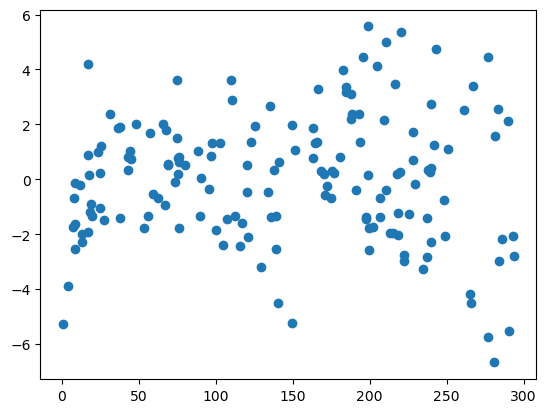

In [42]:
plt.scatter(X_train,res)
plt.show()

In [43]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)
y_pred.head()

197    16.890609
109    21.342017
101    23.669921
125    11.791931
48     19.740873
dtype: float64

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.1480858712755264

In [45]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8037604858331856

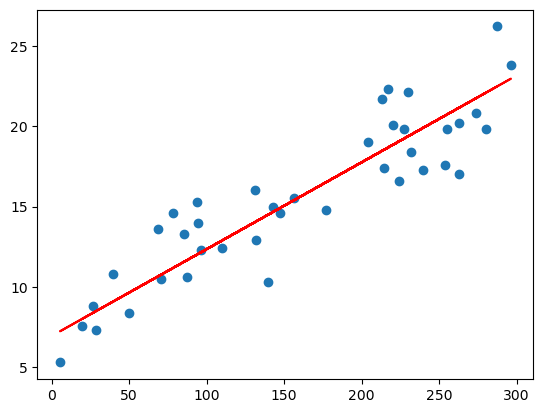

In [46]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()